In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(8.805070630260971, -140.79975584720358), (80.25273734856916, 20.689793164789307), (-61.02309979061992, 149.28108488560758), (-34.50344208130504, -118.09453654833061), (-88.58468656404699, 48.19024630425059), (-11.115442674160349, 96.43172661842311), (-18.62862993263471, -105.11162648124152), (54.77810176207265, -0.14487193742004933), (86.66553327228536, -155.8244189466191), (61.33673524836061, -149.33840401306153), (36.01936605976876, 27.556813469015566), (-27.78031288252103, 80.6573082684007), (54.771837543857345, -73.39840460842315), (-28.37775100320266, 106.78856529255046), (78.79838428689257, 125.37229251074768), (39.05033892964019, 50.22760067889135), (75.24667957433428, -130.79812768170794), (7.242147770054018, -125.82322455355131), (72.70772062068954, 137.3418395635287), (-63.20413736381286, -107.5572169007199), (85.47172030194474, -63.147844696897124), (-23.926102125772545, -40.1026129164932), (18.647578097013238, -54.727512363899876), (-0.41600873266860106, 119.2584587535824

In [7]:
print(len(coordinates))

1500


In [8]:
print(coordinates[0])

(8.805070630260971, -140.79975584720358)


In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 67.71,
  'feels_like': 67.19,
  'temp_min': 59.09,
  'temp_max': 75.6,
  'pressure': 1018,
  'humidity': 64},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 289, 'gust': 11.01},
 'clouds': {'all': 90},
 'dt': 1621988446,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1621934050,
  'sunset': 1621987715},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Get the JSON data.
boston_data = city_weather.json()

In [12]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1621934050,
 'sunset': 1621987715}

In [13]:
boston_data["sys"]["country"]

'US'

In [14]:
boston_data["main"]["temp_max"]

75.6

In [15]:
boston_data["coord"]["lat"]

42.3584

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
country = boston_data["sys"]["country"]
print(lat,lng,max_temp,humidity,clouds,wind,country)

42.3584 -71.0598 75.6 64 90 5.01 US


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-05-26 00:20:46'

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | scarborough
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | wasilla
Processing Record 11 of Set 1 | embonas
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | chapais
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | neftcala
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | armacao dos buz

Processing Record 37 of Set 4 | arraial do cabo
Processing Record 38 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 39 of Set 4 | clyde river
Processing Record 40 of Set 4 | maragogi
Processing Record 41 of Set 4 | itaituba
Processing Record 42 of Set 4 | zheleznodorozhnyy
Processing Record 43 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 44 of Set 4 | the valley
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | srandakan
Processing Record 47 of Set 4 | hojai
Processing Record 48 of Set 4 | maniitsoq
Processing Record 49 of Set 4 | magadan
Processing Record 50 of Set 4 | margate
Processing Record 1 of Set 5 | wanning
Processing Record 2 of Set 5 | la ronge
Processing Record 3 of Set 5 | rungata
City not found. Skipping...
Processing Record 4 of Set 5 | ust-ishim
Processing Record 5 of Set 5 | hervey bay
Processing Record 6 of Set 5 | cockburn town
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | samos
P

Processing Record 26 of Set 8 | zhucheng
Processing Record 27 of Set 8 | antanifotsy
Processing Record 28 of Set 8 | vao
Processing Record 29 of Set 8 | thessalon
Processing Record 30 of Set 8 | lumphat
Processing Record 31 of Set 8 | leopold
Processing Record 32 of Set 8 | ahipara
Processing Record 33 of Set 8 | port hedland
Processing Record 34 of Set 8 | charters towers
Processing Record 35 of Set 8 | karasburg
Processing Record 36 of Set 8 | amahai
Processing Record 37 of Set 8 | saint anthony
Processing Record 38 of Set 8 | mpophomeni
Processing Record 39 of Set 8 | tubuala
Processing Record 40 of Set 8 | tiarei
Processing Record 41 of Set 8 | krasnoselkup
Processing Record 42 of Set 8 | ancud
Processing Record 43 of Set 8 | tuensang
Processing Record 44 of Set 8 | norman wells
Processing Record 45 of Set 8 | arinos
Processing Record 46 of Set 8 | amga
Processing Record 47 of Set 8 | tateyama
Processing Record 48 of Set 8 | bullhead city
Processing Record 49 of Set 8 | sovetskiy
P

Processing Record 16 of Set 12 | naryan-mar
Processing Record 17 of Set 12 | mongu
Processing Record 18 of Set 12 | aksum
Processing Record 19 of Set 12 | rome
Processing Record 20 of Set 12 | nyurba
Processing Record 21 of Set 12 | turukhansk
Processing Record 22 of Set 12 | bongandanga
Processing Record 23 of Set 12 | khonuu
City not found. Skipping...
Processing Record 24 of Set 12 | itoman
Processing Record 25 of Set 12 | biak
Processing Record 26 of Set 12 | grand gaube
Processing Record 27 of Set 12 | cairns
Processing Record 28 of Set 12 | bodden town
Processing Record 29 of Set 12 | gat
Processing Record 30 of Set 12 | kikerino
Processing Record 31 of Set 12 | kununurra
Processing Record 32 of Set 12 | del rio
Processing Record 33 of Set 12 | quelimane
Processing Record 34 of Set 12 | san ramon
Processing Record 35 of Set 12 | zhanakorgan
Processing Record 36 of Set 12 | atar
Processing Record 37 of Set 12 | khorixas
Processing Record 38 of Set 12 | lodja
Processing Record 39 o

In [20]:
len(city_data)

562

### Convert array of dictionary to pandas DataFrame

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,84.27,65,90,11.50,US,2021-05-26 00:17:06
1,Longyearbyen,78.2186,15.6401,30.04,74,75,18.41,SJ,2021-05-26 00:20:47
2,Hobart,-42.8794,147.3294,55.26,69,75,4.00,AU,2021-05-26 00:20:19
3,Rikitea,-23.1203,-134.9692,77.27,78,68,15.05,PF,2021-05-26 00:20:47
4,Port Alfred,-33.5906,26.8910,63.16,89,69,10.16,ZA,2021-05-26 00:20:48
5,Bengkulu,-3.8004,102.2655,77.76,84,78,2.84,ID,2021-05-26 00:17:03
6,Puerto Ayora,-0.7393,-90.3518,74.55,91,32,5.01,EC,2021-05-26 00:20:48
7,Scarborough,54.2797,-0.4044,48.02,86,31,9.60,GB,2021-05-26 00:20:48
8,Barrow,71.2906,-156.7887,28.42,80,90,9.22,US,2021-05-26 00:20:49
9,Wasilla,61.5814,-149.4394,75.65,23,1,5.75,US,2021-05-26 00:20:49


In [22]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [23]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-05-26 00:17:06,19.7297,-155.0900,84.27,65,90,11.50
1,Longyearbyen,SJ,2021-05-26 00:20:47,78.2186,15.6401,30.04,74,75,18.41
2,Hobart,AU,2021-05-26 00:20:19,-42.8794,147.3294,55.26,69,75,4.00
3,Rikitea,PF,2021-05-26 00:20:47,-23.1203,-134.9692,77.27,78,68,15.05
4,Port Alfred,ZA,2021-05-26 00:20:48,-33.5906,26.8910,63.16,89,69,10.16
5,Bengkulu,ID,2021-05-26 00:17:03,-3.8004,102.2655,77.76,84,78,2.84
6,Puerto Ayora,EC,2021-05-26 00:20:48,-0.7393,-90.3518,74.55,91,32,5.01
7,Scarborough,GB,2021-05-26 00:20:48,54.2797,-0.4044,48.02,86,31,9.60
8,Barrow,US,2021-05-26 00:20:49,71.2906,-156.7887,28.42,80,90,9.22
9,Wasilla,US,2021-05-26 00:20:49,61.5814,-149.4394,75.65,23,1,5.75


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


### Latitude and Temperature

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/25/21'

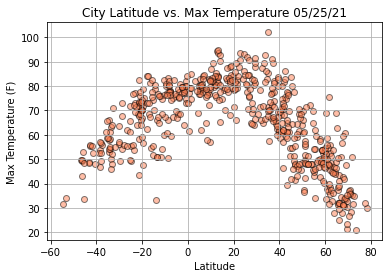

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", color = "coral", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Latitude Vs Humidity

In [28]:
len(city_data_df["Humidity"])

562

In [29]:
len(city_data_df["Lat"])

562

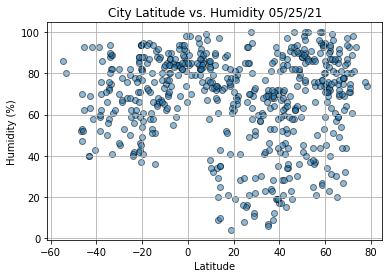

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Latitude and Cloudiness

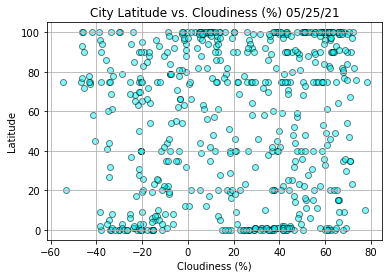

In [31]:
# Build the scatter plots for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            color = "cyan", alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

### Latitude vs Wind speed

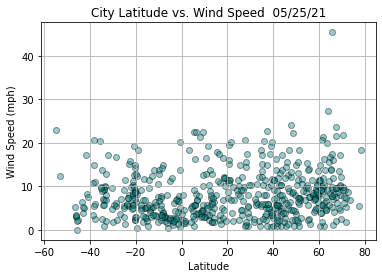

In [32]:
# Build the scatter plots for latitude vs. Wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            color = "teal", alpha=0.4, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed  "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Regression Analysis

In [33]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values , color = "coral",edgecolor = "black", linewidth = 1 , alpha = 0.5)
    plt.plot(x_values,regress_values,"r")
    print('\033[92m'+'\033[1m'+"Correlation Coefficient (R-squared)={}" \
          .format(round(r_value,3))+'\033[0m')
    print('\033[94m'+'\033[1m'+"p-value (level of statistical significance) = {}" \
          .format(round(p_value,7))+'\033[0m')
    print('\033[96m'+'\033[1m'+"Standard error of estimate = {}" \
          .format(round(std_err,3))+'\033[0m')
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [35]:
index_13 = city_data_df.loc[13]
index_13

City                    Carnarvon
Country                        AU
Date          2021-05-26 00:17:04
Lat                      -24.8667
Lng                      113.6333
Max Temp                    55.47
Humidity                       62
Cloudiness                     94
Wind Speed                   11.5
Name: 13, dtype: object

In [36]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-05-26 00:17:06,19.7297,-155.0900,84.27,65,90,11.50
1,Longyearbyen,SJ,2021-05-26 00:20:47,78.2186,15.6401,30.04,74,75,18.41
7,Scarborough,GB,2021-05-26 00:20:48,54.2797,-0.4044,48.02,86,31,9.60
8,Barrow,US,2021-05-26 00:20:49,71.2906,-156.7887,28.42,80,90,9.22
9,Wasilla,US,2021-05-26 00:20:49,61.5814,-149.4394,75.65,23,1,5.75


In [37]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Hobart,AU,2021-05-26 00:20:19,-42.8794,147.3294,55.26,69,75,4.00
3,Rikitea,PF,2021-05-26 00:20:47,-23.1203,-134.9692,77.27,78,68,15.05
4,Port Alfred,ZA,2021-05-26 00:20:48,-33.5906,26.8910,63.16,89,69,10.16
5,Bengkulu,ID,2021-05-26 00:17:03,-3.8004,102.2655,77.76,84,78,2.84
6,Puerto Ayora,EC,2021-05-26 00:20:48,-0.7393,-90.3518,74.55,91,32,5.01


### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

Correlation Coefficient (R-squared)=-0.806
p-value (level of statistical significance) = 0.0
Standard error of estimate = 0.027


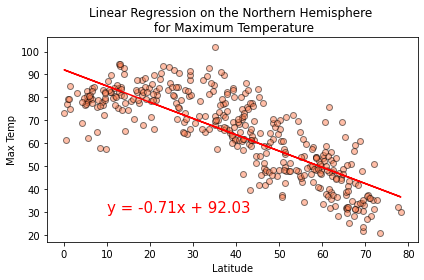

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,30))

### Linear Regression on max Temp for Southern Hemisphere

Correlation Coefficient (R-squared)=0.708
p-value (level of statistical significance) = 0.0
Standard error of estimate = 0.049


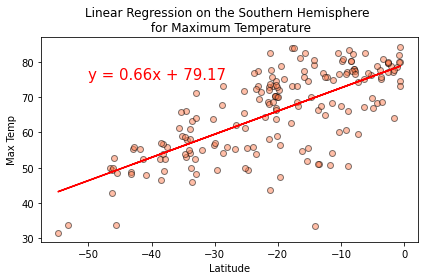

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,75))

### Linear Regression on Humidity for Northern Hemisphere

Correlation Coefficient (R-squared)=0.051
p-value (level of statistical significance) = 0.3167587
Standard error of estimate = 0.06


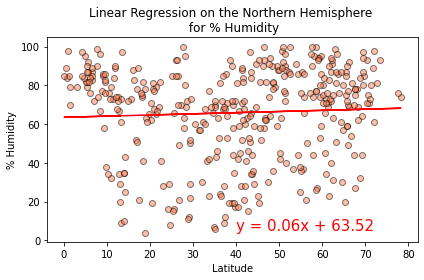

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,5))

Correlation Coefficient (R-squared)=0.321
p-value (level of statistical significance) = 1.11e-05
Standard error of estimate = 0.086


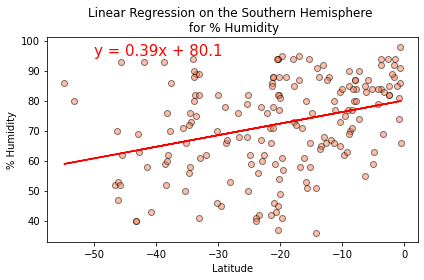

In [51]:
# Linear regression on the Southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call. the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-50,95))

### Linear Regression on the Percent Cloudiness for the Northern Hemisphere


Correlation Coefficient (R-squared)=-0.021
p-value (level of statistical significance) = 0.6785819
Standard error of estimate = 0.028


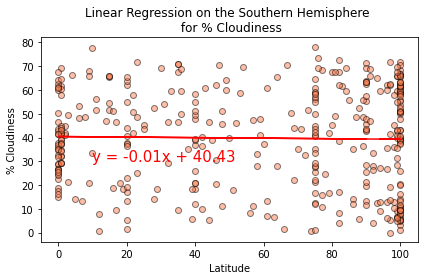

In [42]:
# Linear regression on the Northern hemisphere
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Lat"]
# Call. the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (10,30))

Correlation Coefficient (R-squared)=-0.006
p-value (level of statistical significance) = 0.9365922
Standard error of estimate = 0.027


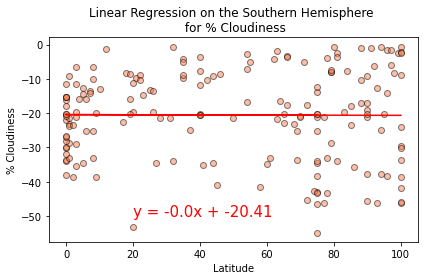

In [55]:
# Linear regression on the Southern hemisphere
x_values = southern_hemi_df["Cloudiness"]
y_values = southern_hemi_df["Lat"]
# Call. the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (20,-50))

### Latitude and Wind Speed

Correlation Coefficient (R-squared)=0.132
p-value (level of statistical significance) = 0.0100379
Standard error of estimate = 0.014


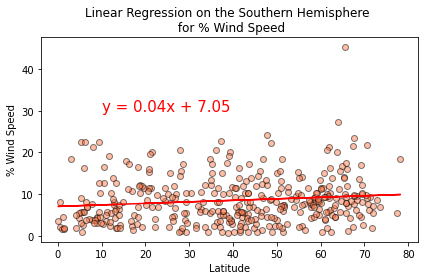

In [44]:
# Linear regression on the Northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call. the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Wind Speed", "% Wind Speed", (10,30))

Correlation Coefficient (R-squared)=0.132
p-value (level of statistical significance) = 0.0100379
Standard error of estimate = 0.014


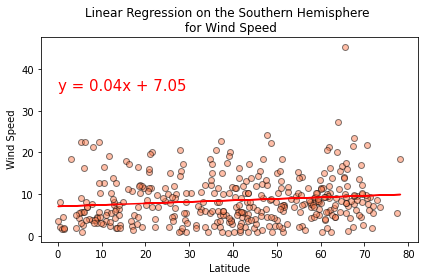

In [58]:
# Linear regression on the Southern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call. the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Wind Speed", " Wind Speed", (0,35))